In [1]:
!pip install numpy==2.0.2
!pip install --upgrade scikit-learn

  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.0.2 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.10.1 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: Operation cancelled by user
^C


/tmp/ipython-input-1-1729746296.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock_symbol, start="2013-01-01", end="2023-01-01", progress=False)['Close']
/tmp/ipython-input-1-1729746296.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty_data = yf.download(nifty_symbol, start="2013-01-01", end="2023-01-01", progress=False)['Close']
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.0118
Epoch 2/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 4.1178e-04
Epoch 3/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3.9999e-04
Epoch 4/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 3.4855e-04
Epoch 5/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3.4317e-04
Epoch 6/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 3.2158e-04
Epoch 7/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.8083e-04
Epoch 8/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.7585e-04
Epoch 9/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.1013e-04
Epoch 10/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 2.3141e-04
Epoch 11/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.8446e-04
Epoch 12/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.1368e-04
Epoch 13/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1.8609e-04
Epoch 14/50
1971/1971 ━━━━━━━━━━━━━━━━━━━━ 10s

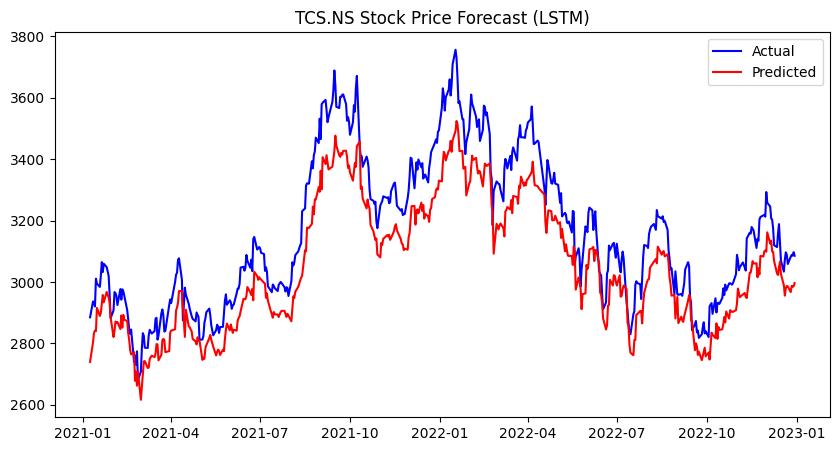

MSE: 15705.8770
RMSE: 125.3231
MAPE: 3.56%


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Download stock and NIFTY data
stock_symbol = 'TCS.NS'
nifty_symbol = '^NSEI'
stock_data = yf.download(stock_symbol, start="2013-01-01", end="2023-01-01", progress=False)['Close']
nifty_data = yf.download(nifty_symbol, start="2013-01-01", end="2023-01-01", progress=False)['Close']

# Train-Test Split
train_size = int(len(stock_data) * 0.8)
train_stock = stock_data[:train_size]
test_stock = stock_data[train_size:]
train_nifty = nifty_data[:train_size]
test_nifty = nifty_data[train_size:]

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_stock_scaled = scaler.fit_transform(train_stock.values.reshape(-1, 1))
test_stock_scaled = scaler.transform(test_stock.values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Parameters
seq_length = 3

# Create sequences
X_train, y_train = create_sequences(train_stock_scaled, seq_length)
X_test, y_test = create_sequences(test_stock_scaled, seq_length)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1)

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot Results
plt.figure(figsize=(10,5))
plt.plot(test_stock.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label="Actual", color="blue")
plt.plot(test_stock.index[-len(predictions):], predictions, label="Predicted", color="red")
plt.legend()
plt.title(f"{stock_symbol} Stock Price Forecast (LSTM)")
plt.show()

# Evaluation Metrics
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_actual, predictions) * 100

# Print Results
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
